# Matrices en Numpy

Basado en documento de la libreria [Numpy](https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html)

Importamos la librería Numpy con nombre "np".

In [ ]:
import numpy as np

## Matriz por filas

Para crear un arreglo en forma de matriz de 2 dimensiones (filas y columnas), se realiza así

In [ ]:
A = np.array([[1,2,3],[4,5,6]])
print(A, A.shape)

In [ ]:
A2 = np.asarray([[1,2,3],[4,5,6]])
print(A2, A2.shape)

# Ampliando la matriz

## Agregando filas a una matriz


Si quiere agregar una nueva fila a una matriz:

In [ ]:
b = np.array([[7,8,9]])
# axis=0 - concatena a lo largo de las filas
print(np.concatenate((A, b), axis=0))

In [ ]:
print(np.vstack((A, b)))

In [ ]:
# axis=0 - concatenate a lo largo de las filas
np.append(A, b, axis=0)

## Agregando Columnas a una matriz


In [ ]:
c = np.array([[7],[8]])
# c = np.array([[7,8]]).T
# axis=0 - concatena a lo largo de las columnas
print(np.concatenate((A, c), axis=1))

In [ ]:
print(np.hstack((A,c)))

In [ ]:
# axis=0 - concatena a lo largo de las columnas
print(np.append(A, c, axis=1))

# Medidas sobre matrices $R^{N\times N}\rightarrow R$



## Determinante

In [ ]:
Ac = np.append(A, b, axis=0)
np.linalg.det(Ac)

## Rango

In [ ]:
np.linalg.matrix_rank(Ac)

## Norma

In [ ]:
np.linalg.norm(Ac)

In [ ]:
np.sqrt(np.sum(Ac**2))

# Solucion a sistemas de ecuaciones

Sunpoga que se tiene el siguiente sistemas de ecuaciones: <br>
$x+3y+5z=10,$ <br>
$2x+5y+z=8,$ <br>
$2x+3y+8z=13$.

In [ ]:
A = np.array([[1, 3, 5],[2, 5, 1],[2,3,8]])
b = np.array([[10, 8, 13]]).T

In [ ]:
x1 = np.linalg.inv(A)@b
print(x1)

In [ ]:
x2 = np.linalg.inv(A).dot(b)
print(x2)

In [ ]:
x2 = np.linalg.solve(A,b)
print(x2)

# Productos entre matrices

In [ ]:
A = np.array([[1, 3, 5],[2, 5, 1],[2,3,8]])
B = np.array([[2, 4, 1],[3, 6, 2],[7,2,5]])

In [ ]:
A@B

In [ ]:
B@A

In [ ]:
A.dot(B)

In [ ]:
np.linalg.inv(A).dot(B) #A^(-1)B

In [ ]:
np.linalg.solve(A,B)

Ejercicios:
Solucionar el siguiente circuito [enlace](http://hyperphysics.phy-astr.gsu.edu/hbasees/electric/imgele/dcx7.gif).




In [ ]:
#Hacer codigo aqui

## Funciones y Señales a partir de vectores

Numpy se emplea para hacer broadcasting sobre funciones de una forma vectorial, por ejemplo, si se tiene el vector x=[1,2,3,4], se puede obtener el cuadrado de cada elemento asi, x**2.

In [ ]:
x = np.array([1,2,3,4])
x2 = x**2
print(x2)

Ejercicio: realizar el problema de conversion de grados a Farenheit, donde los grados estan guardados en un arreglo de numpy usando la funcion arange.

In [ ]:
#Hacer codigo aqui

Numpy tambien se emplea para graficar vectores de funciones trigonometricas o señales en el tiempo. Por ejemplo:
$$
y(t) = A\cos(\omega t + \theta)
$$
donde $t$ es un vector en el tiempo.

In [ ]:
A = 10
w = 60
theta = np.radians(45)
t = np.linspace(0,1,100) # arreglo
y = A*np.cos(w*t+theta)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(t,y)

Ejercicio: realizar el grafico de
$$
 f(t) = \exp(2*t)\sin(2\pi t)
$$
para $t$ entre [0,1] con 1000 valores.

## Vectorizando funciones
Numpy permite vectorizar las funciones de python, para que puedan recibir vectores

In [ ]:
import numpy as np

In [ ]:
def ecuacion(x):
  if x < 0:
    return x**2+2*x+1
  else:
    return x**2-2*x+1

In [ ]:
ecuacion_vec = np.vectorize(ecuacion)

In [ ]:
x = np.linspace(-10,10,100)
res = ecuacion_vec(x)

In [ ]:
plt.plot(x,res)

## Aplicando matrices para evaluar funciones multivariadas

Numpy tiene funciones que permiten evaluar una funcion de este tipo
$$ f(x_1,x_2) = x_1^2+x_1x_2
$$

In [ ]:
def f(x):
  return x[0]**2+x[0]*x[1]

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])

print("Eje 0: ", np.apply_along_axis(f,0,X))
print("Eje 1: ", np.apply_along_axis(f,1,X))

## Ecuaciones diferenciales

Usando la libreria Scipy podemos simular ecuaciones diferenciales ordinarias y no-lineales. Para los ODEs (ecuaciones diferenciales ordinarias) empleamos la funcion `odeint`. Como ejemplo queremos simular la siguiente ODE
$$
\frac{dy(t)}{dt} = -k \; y(t)
$$

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# Funcio que retorna dy/dt
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

In [3]:
# condicion inicial
y0 = 5

# vector de tiempos
t = np.linspace(0,20)

# solucion de la ODE
y = odeint(model,y0,t)

In [11]:
y.size

50

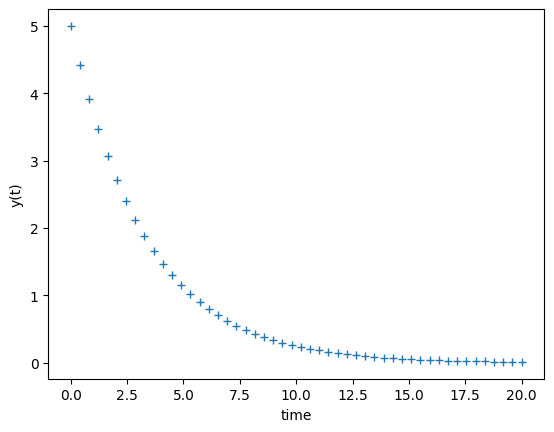

In [12]:
# plot resultados
plt.plot(t,y,'+')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

Podemos manejar el parametro `k` como un argumento de entrada a la ecuacion diferencial, asi

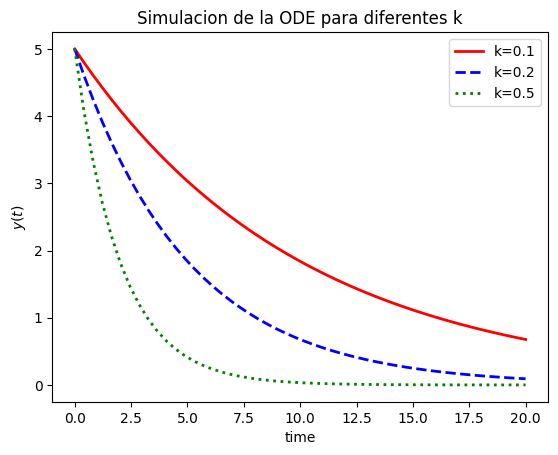

In [10]:
def model(y,t,k):
    dydt = -k * y
    return dydt

# solucionar ODEs
k = 0.1
y1 = odeint(model,y0,t,args=(k,))
k = 0.2
y2 = odeint(model,y0,t,args=(k,))
k = 0.5
y3 = odeint(model,y0,t,args=(k,))

# plot resultados
plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'b--',linewidth=2,label='k=0.2')
plt.plot(t,y3,'g:',linewidth=2,label='k=0.5')
plt.xlabel('time')
plt.ylabel('$y(t)$')
plt.title('Simulacion de la ODE para diferentes k')
plt.legend()
plt.show()

Para ecuacion diferenciales de mayor orden, se requiere usar vectores

$$ \frac{\operatorname{d}^3 y}{\operatorname{d} t^3} + a \frac{\operatorname{d}^2 y}{\operatorname{d} t^2} + b\frac{\operatorname{d} y}{\operatorname{d} t}+c y = u(t)$$

In [13]:
# funcion que recibe y,dy/dt,d2y/dt2
# funcion que retorna dy/dt,d2y/dt2,d3y/dt3
def model(x,t,u): #x is a vector of 3 dimensions
    a = 1
    b = 2
    c = 3

    y = x[0]
    dydt = x[1]
    d2ydt2 = x[2]

    d3ydt3 = - a*d2ydt2 - b*dydt - c*y + u #Derivada de mayor orden

    return np.array([dydt,d2ydt2,d3ydt3])

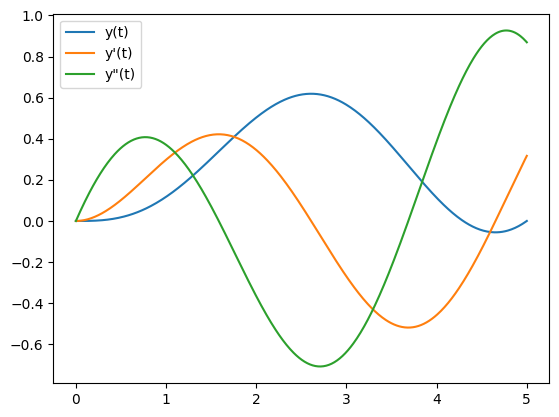

In [18]:
y0 = np.zeros(3)
input = 1
t = np.linspace(0,5,500)
yode3 = odeint(model,y0,t, args=(input,))
plt.plot(t,yode3)
plt.legend(['y(t)','y\'(t)','y\"(t)'])

In [15]:
yode3.shape

(100, 3)

In [19]:
#debe entrar y,    dy/dt
#dede salir dy/dt, d2y/dt2
def model(x,t): #x is a vector of 2 dimensions
    y = x[0]
    dydt = x[1]
    f=1
    w = 2*np.pi*f
    d2ydt2 = np.sin(w*t) #Derivada de mayor orden

    return np.array([dydt,d2ydt2])

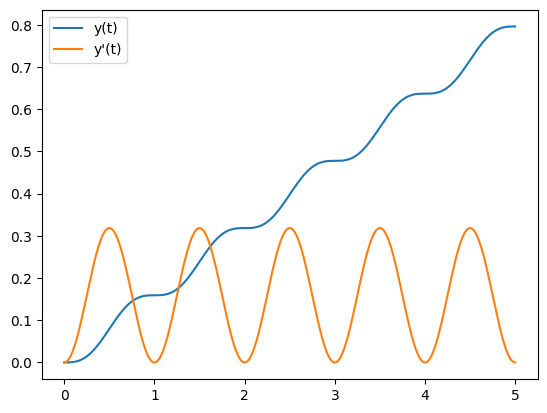

In [22]:
y0 = np.zeros(2)
input = 1
t = np.linspace(0,5,500)
yode2 = odeint(model,y0,t)
plt.plot(t,yode2)
plt.legend(['y(t)','y\'(t)'])

## Ejercicios

1.1. Para la ecuación diferencial de segundo orden, analizar la respuesta al escalon ($u(0) = 0$, y para $t>0$ $u(t)=1$), para cuando las raices del polinomia $ax^2+bx+c$ son:
* Reales.
* Complejas.
Pista: hacer uso de la funcion `roots` de NumPy.
https://math.libretexts.org/Bookshelves/Differential_Equations/Introduction_to_Partial_Differential_Equations_(Herman)/12%3A_B_-_Ordinary_Differential_Equations_Review/12.02%3A_Second_Order_Linear_Differential_Equations

$$ a \frac{\operatorname{d}^2 y}{\operatorname{d} t^2} + b\frac{\operatorname{d} y}{\operatorname{d} t}+c y = u(t)$$

In [26]:
#Hacer codigo aqui
np.roots([1,2,1])


array([-1., -1.])

In [27]:
# entra en x: y, dy/dt
# sale dy/dt, d2y/dt2
def model(x,t): #x is a vector of 2 dimensions
    a,b,c = 1,2,1 #reales la raices
    y = x[0]
    dydt = x[1]
    u=1
    d2ydt2 = 1/a*( -b*dydt - c*y + u) 

    return np.array([dydt,d2ydt2])

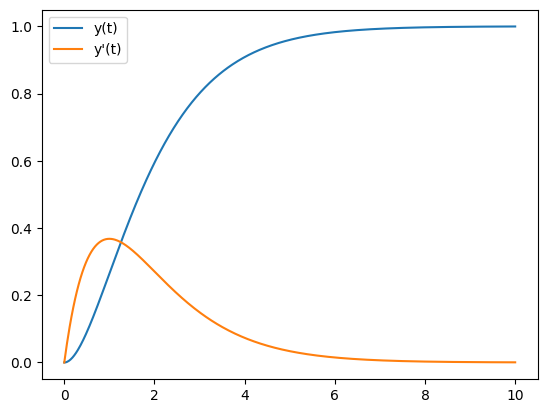

In [29]:
y0 = np.zeros(2)
t = np.linspace(0,10,500)
yode2 = odeint(model,y0,t)
plt.plot(t,yode2)
plt.legend(['y(t)','y\'(t)'])

In [30]:
def model(x,t): #x is a vector of 2 dimensions
    a,b,c = 1,1,1 #reales la raices
    y = x[0]
    dydt = x[1]
    u=1
    d2ydt2 = 1/a*( -b*dydt - c*y + u) 

    return np.array([dydt,d2ydt2])

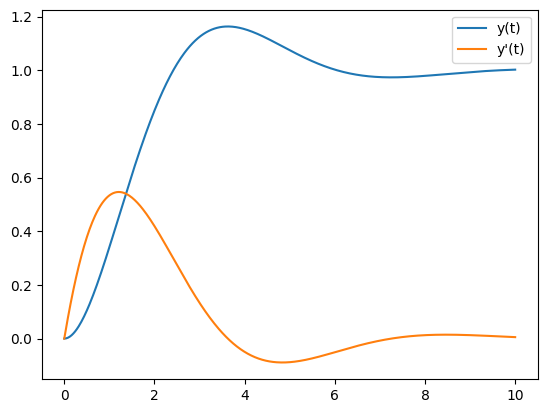

In [31]:
y0 = np.zeros(2)
t = np.linspace(0,10,500)
yode2 = odeint(model,y0,t)
plt.plot(t,yode2)
plt.legend(['y(t)','y\'(t)'])

1.2. Programar la version multidimensional del metodo de Newton para solucionar un sistemas de ecuaciones no lineales. https://en.wikipedia.org/wiki/Newton%27s_method

![](https://www.brnt.eu/phd/img190.png)

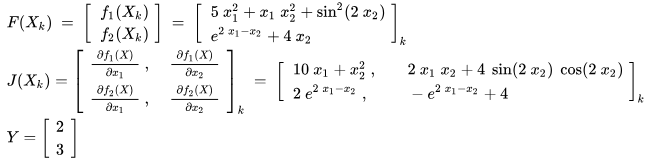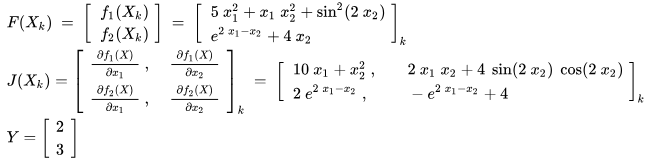

In [58]:
#Hacer codigo aqui
def F(x):
    return np.array([[5*x[0,0]**2 + x[0,0]*x[1,0]**2 + np.sin(2*x[1,0])**2 - 2],
             [np.exp(2*x[0,0]-x[1,0])+4*x[1,0]-3]])

In [59]:
def J(x):
    return np.array([[10*x[0,0]+x[1,0]**2,2*x[0,0]*x[1,0]+4*np.sin(2*x[1,0])*np.cos(2*x[1,0])],
                     [2*np.exp(2*x[0,0]-x[1,0]),-np.exp(2*x[0,0]-x[1,0])+4]])

In [67]:
x = np.array([[1],[1]]) #punto inicial
print(x,'\n',F(x),'\n',J(x))
k = 0
kmax = 10
delta = np.ones((2,1))
while (k<kmax) and (np.linalg.norm(delta)>1e-3):
    print(k)
    delta = np.linalg.solve(J(x),F(x))
    print('delta',delta)
    x = x - delta
    print('x',x)
    k += 1

[[1]
 [1]] 
 [[4.82682181]
 [3.71828183]] 
 [[11.          0.48639501]
 [ 5.43656366  1.28171817]]
0
delta [[0.38221136]
 [1.27981759]]
x [[ 0.61778864]
 [-0.27981759]]
1
delta [[0.04945494]
 [0.03304115]]
x [[ 0.5683337 ]
 [-0.31285874]]
2
delta [[ 0.00102862]
 [-0.00342339]]
x [[ 0.56730508]
 [-0.30943535]]
3
delta [[7.73132453e-06]
 [6.93264858e-06]]
x [[ 0.56729735]
 [-0.30944228]]


In [68]:
x, F(x)

(array([[ 0.56729735],
        [-0.30944228]]),
 array([[3.55811380e-10],
        [1.54173563e-10]]))